# Badanie metryki

In [1]:
import import_ipynb
import matplotlib.pyplot as plt
import numpy
import pandas as pd

In [2]:
import basic_create_model_function as al 

importing Jupyter notebook from basic_create_model_function.ipynb
Trenuję: 
313/313 [==============================] - 1s 1ms/step - loss: 0.0972 - accuracy: 0.9690

Trenowanie trwało: [3.9324748516082764, 3.266615152359009, 3.6416590213775635] sekund
Loss dla danych testowych: [0.1290871649980545, 0.11003799736499786, 0.09720227122306824]
Metryka dla danych testowych: [0.958899974822998, 0.9649999737739563, 0.968999981880188]
Loss dla danych trenowanych - uczących: [0.262815922498703, 0.10673058032989502, 0.07175721228122711]
Metryka dla danych trenowanych - uczących: [0.9220166802406311, 0.9666666388511658, 0.9771333336830139]
Trenuję: 
313/313 [==============================] - 0s 1ms/step - loss: 0.0882 - accuracy: 0.9728

Trenowanie trwało: [3.9771382808685303, 3.4652602672576904, 3.7839624881744385] sekund
Loss dla danych testowych: [0.13464005291461945, 0.10404062271118164, 0.08816277980804443]
Metryka dla danych testowych: [0.9589999914169312, 0.9681000113487244, 0.972800016403

In [3]:
def print_training_time_loss_acc(val_loss, val_acc,loss,acc, training_time):
    print()
    print("Trenowanie trwało: " + str(training_time) + " sekund")
    print("Loss dla danych testowych: " + str(val_loss))
    print("Metryka dla danych testowych: " + str(val_acc))
    print("Loss dla danych trenowanych - uczących: " + str(loss)) 
    print("Metryka dla danych trenowanych - uczących: " + str(acc))

In [4]:
def plot_loss_and_metric(val_loss, val_acc, loss, acc, metricname='accuracy'):
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('model' + metricname)
    plt.ylabel(metricname)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [10]:
val_loss, val_acc,loss,acc, training_time, model = al.create_model_with_history_for_all_epochs(verbose = 0)

Trenuję: 


In [11]:
print_training_time_loss_acc(val_loss, val_acc,loss,acc, training_time)


Trenowanie trwało: [3.445100784301758, 2.9428420066833496, 2.8094680309295654] sekund
Loss dla danych testowych: [0.13710732758045197, 0.1065857782959938, 0.09643314778804779]
Metryka dla danych testowych: [0.9589999914169312, 0.9660999774932861, 0.9695000052452087]
Loss dla danych trenowanych - uczących: [0.2715121805667877, 0.10962628573179245, 0.07328122109174728]
Metryka dla danych trenowanych - uczących: [0.9193500280380249, 0.9664333462715149, 0.9757166504859924]


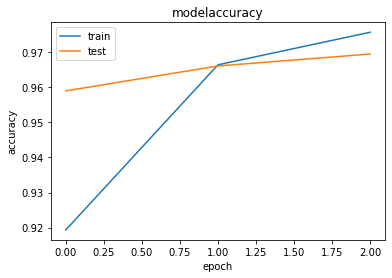

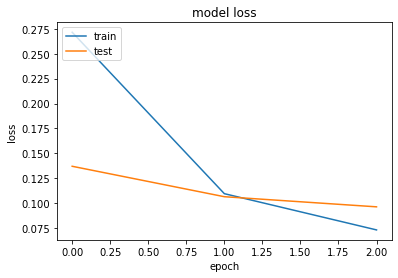

In [12]:
plot_loss_and_metric(val_loss, val_acc,loss,acc)

In [13]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [14]:
s = 0
for i in range (0,500):
    pred = model.predict(x_test[i].reshape(1, 28, 28, 1))
    if pred.argmax() != y_test[i]:
        print(i, end=" ")
        s = s + 1
print(s)

18 115 151 241 247 259 274 321 340 391 425 495 12


4
9


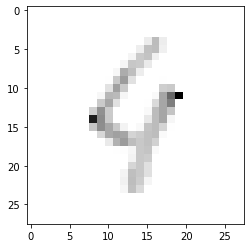

In [20]:
image_index = 115
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(y_test[image_index])
print(pred.argmax())

3
8


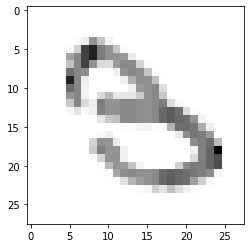

In [15]:
image_index = 18
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(y_test[image_index])
print(pred.argmax())

7
7


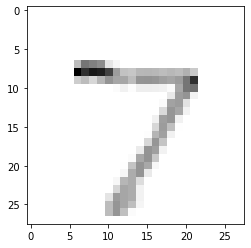

In [18]:
image_index = 0
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(y_test[image_index])
print(pred.argmax())

4
4


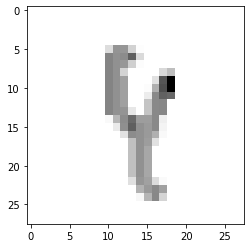

In [22]:
image_index = 497
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(y_test[image_index])
print(pred.argmax())

In [15]:
print("binary_accuracy")
val_loss, val_acc,loss,acc, training_time, model = al.create_model_with_history_for_all_epochs(verbose = 0, metrics='binary_accuracy')
print(acc[len(acc)-1])

binary_accuracy
Trenuję: 
0.10010664910078049


In [25]:
print("sparse_categorical_crossentropy")
val_loss, val_acc,loss,acc, training_time, model = al.create_model_with_history_for_all_epochs(verbose = 0, metrics='sparse_categorical_crossentropy')
print(acc[len(acc)-1])

sparse_categorical_crossentropy
Trenuję: 
0.07483862340450287


In [28]:
print("mean_squared_error")
val_loss, val_acc,loss,acc, training_time, model = al.create_model_with_history_for_all_epochs(verbose = 0, metrics='mean_squared_error')
print(acc[len(acc)-1])

mean_squared_error
Trenuję: 
27.390575408935547


In [ ]:
def avarage_create_model_for_different_number_of_layers():
    df = pd.DataFrame(columns=['metric', 'val_loss', 'val_acc', 'loss', 'acc', 'trains_time'])

    index = 0
    
    metrics = ['accuracy', 'binary_accuracy']

    for i  in range(10):
        index_name = 0
        for metric in metrics:
            
            val_loss, val_acc, loss, acc, trains_time, model = al.create_model_with_history_for_all_epochs(metrics = metric)
            
            ls = [number_of_layers,val_loss[-1], val_acc[-1], loss[-1], acc[-1], sum(trains_time)]
            
            df.loc[index] = ls

            index += 1 
            index_name += 1 

    df_mean = df.groupby(by='layer').mean().reset_index()
    return df_mean